In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC

**Elevating Airline Operations & Customer Service**

This project aims to analyze airline operations and customer service data to improve efficiency and passenger satisfaction


Tasks:
- Data cleaning and preparation
- Exploratory data analysis
- Predictive modeling for customer satisfaction
- Operational efficiency analysis
- Insight extraction and recommendations

Minimum Viable Product Features:
- Interactive dashboard
- Predictition customer satisfaction

**1. Data cleaning and preparation**

In [2]:
df=pd.read_csv("/Users/skyhome/Desktop/AirlineData/train.csv")
df_test=pd.read_csv("/Users/skyhome/Desktop/AirlineData/test.csv")

In [3]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


**Searching missing data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
# Finding missing values in each column
missing_data = df.isnull().sum()
print("Missing data in each column:\n", missing_data)

Missing data in each column:
 id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction               

In [7]:
df[df['Arrival Delay in Minutes'].isna()]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,...,5,1,5,5,5,3,5,0,NaN,satisfied


In [8]:
df.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

**Handling outliers**

In [9]:
print(df['Age'].max())
print(df['Age'].min())

85
7


**Encoding categorical variables.**

In [10]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column, ": ")
        print(df[column].unique())

Gender : 
['Male' 'Female']
Customer Type : 
['Loyal Customer' 'disloyal Customer']
Type of Travel : 
['Personal Travel' 'Business travel']
Class : 
['Eco Plus' 'Business' 'Eco']
satisfaction : 
['neutral or dissatisfied' 'satisfied']


In [11]:
gender_map = {'Male': 0, 'Female': 1}
customer_type_map = {'Loyal Customer': 1, 'disloyal Customer': 0}
travel_type_map = {'Personal Travel': 0, 'Business travel': 1}
class_map = {'Eco Plus': 0, 'Business': 1, 'Eco': 2}
satisfaction_map = {'neutral or dissatisfied': 0, 'satisfied': 1}


df['xGender'] = df['Gender'].replace(gender_map)
df['xCustomer Type'] = df['Customer Type'].replace(customer_type_map)
df['xType of Travel'] = df['Type of Travel'].replace(travel_type_map)
df['xClass'] = df['Class'].replace(class_map)
df['xsatisfaction'] = df['satisfaction'].replace(satisfaction_map)


In [12]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,xGender,xCustomer Type,xType of Travel,xClass,xsatisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,5,25,18.0,neutral or dissatisfied,0,1,0,0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,4,1,1,6.0,neutral or dissatisfied,0,0,1,1,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,5,0,0.0,satisfied,1,1,1,1,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,4,2,11,9.0,neutral or dissatisfied,1,1,1,1,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,0,0.0,satisfied,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,3,2,3,0.0,neutral or dissatisfied,1,0,1,2,0
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,4,0,0.0,satisfied,0,1,1,1,1
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,5,4,7,14.0,neutral or dissatisfied,0,0,1,1,0
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,4,1,0,0.0,neutral or dissatisfied,1,0,1,2,0


In [13]:
# df.groupby('id').value_counts()
counts = df.groupby('id').size()
counts.sort_values(ascending=True)

id
1         1
86533     1
86531     1
86530     1
86529     1
         ..
43291     1
43290     1
43289     1
43304     1
129880    1
Length: 103594, dtype: int64

In [14]:
df.shape

(103594, 29)

**Normalizing or standardizing numerical columns**

In [15]:
df['Flight Distance'].describe()

count    103594.000000
mean       1189.325202
std         997.297235
min          31.000000
25%         414.000000
50%         842.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

Spread: The data show a significant spread, as indicated by the standard deviation (std) of approximately 997.3. This suggests that flight distances vary widely.
Minimum and Maximum Values: Flight distances range from 31 to 4983, indicating a broad spectrum of flight lengths.
Median and Mean: The median (50% or median) is 842, which is less than the mean value (mean) of 1189.3. This hints at a right-skewed (positive skew) distribution, where more values are concentrated in the lower range.
Quartiles: 25% of all flights have a distance of up to 414, and 75% - up to 1743. This further confirms the wide variance in values.

In [16]:
# Z-score normalization (standardization)
df['Flight Distance Standardized'] = (df['Flight Distance'] - df['Flight Distance'].mean()) / df['Flight Distance'].std()

# Min-max normalization
df['Flight Distance Min-Max'] = (df['Flight Distance'] - df['Flight Distance'].min()) / (df['Flight Distance'].max() - df['Flight Distance'].min())


In [17]:
df['Flight Distance Min-Max']

0         0.086632
1         0.041195
2         0.224354
3         0.107229
4         0.036955
            ...   
103899    0.032512
103900    0.467690
103901    0.396607
103902    0.195679
103903    0.341680
Name: Flight Distance Min-Max, Length: 103594, dtype: float64

In [18]:
df.to_json('/Users/skyhome/Desktop/AirlineData/train.json', orient='records', lines=True)

**2. Exploratory data analysis**

In [19]:
print(df.describe())


                  id            Age  Flight Distance  Inflight wifi service  \
count  103594.000000  103594.000000    103594.000000          103594.000000   
mean    64942.428625      39.380466      1189.325202               2.729753   
std     37460.816597      15.113125       997.297235               1.327866   
min         1.000000       7.000000        31.000000               0.000000   
25%     32562.250000      27.000000       414.000000               2.000000   
50%     64890.000000      40.000000       842.000000               3.000000   
75%     97370.500000      51.000000      1743.000000               4.000000   
max    129880.000000      85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103594.000000           103594.000000   
mean                            3.060081                2.756984   
std                             1.525233                1.398934   
min             

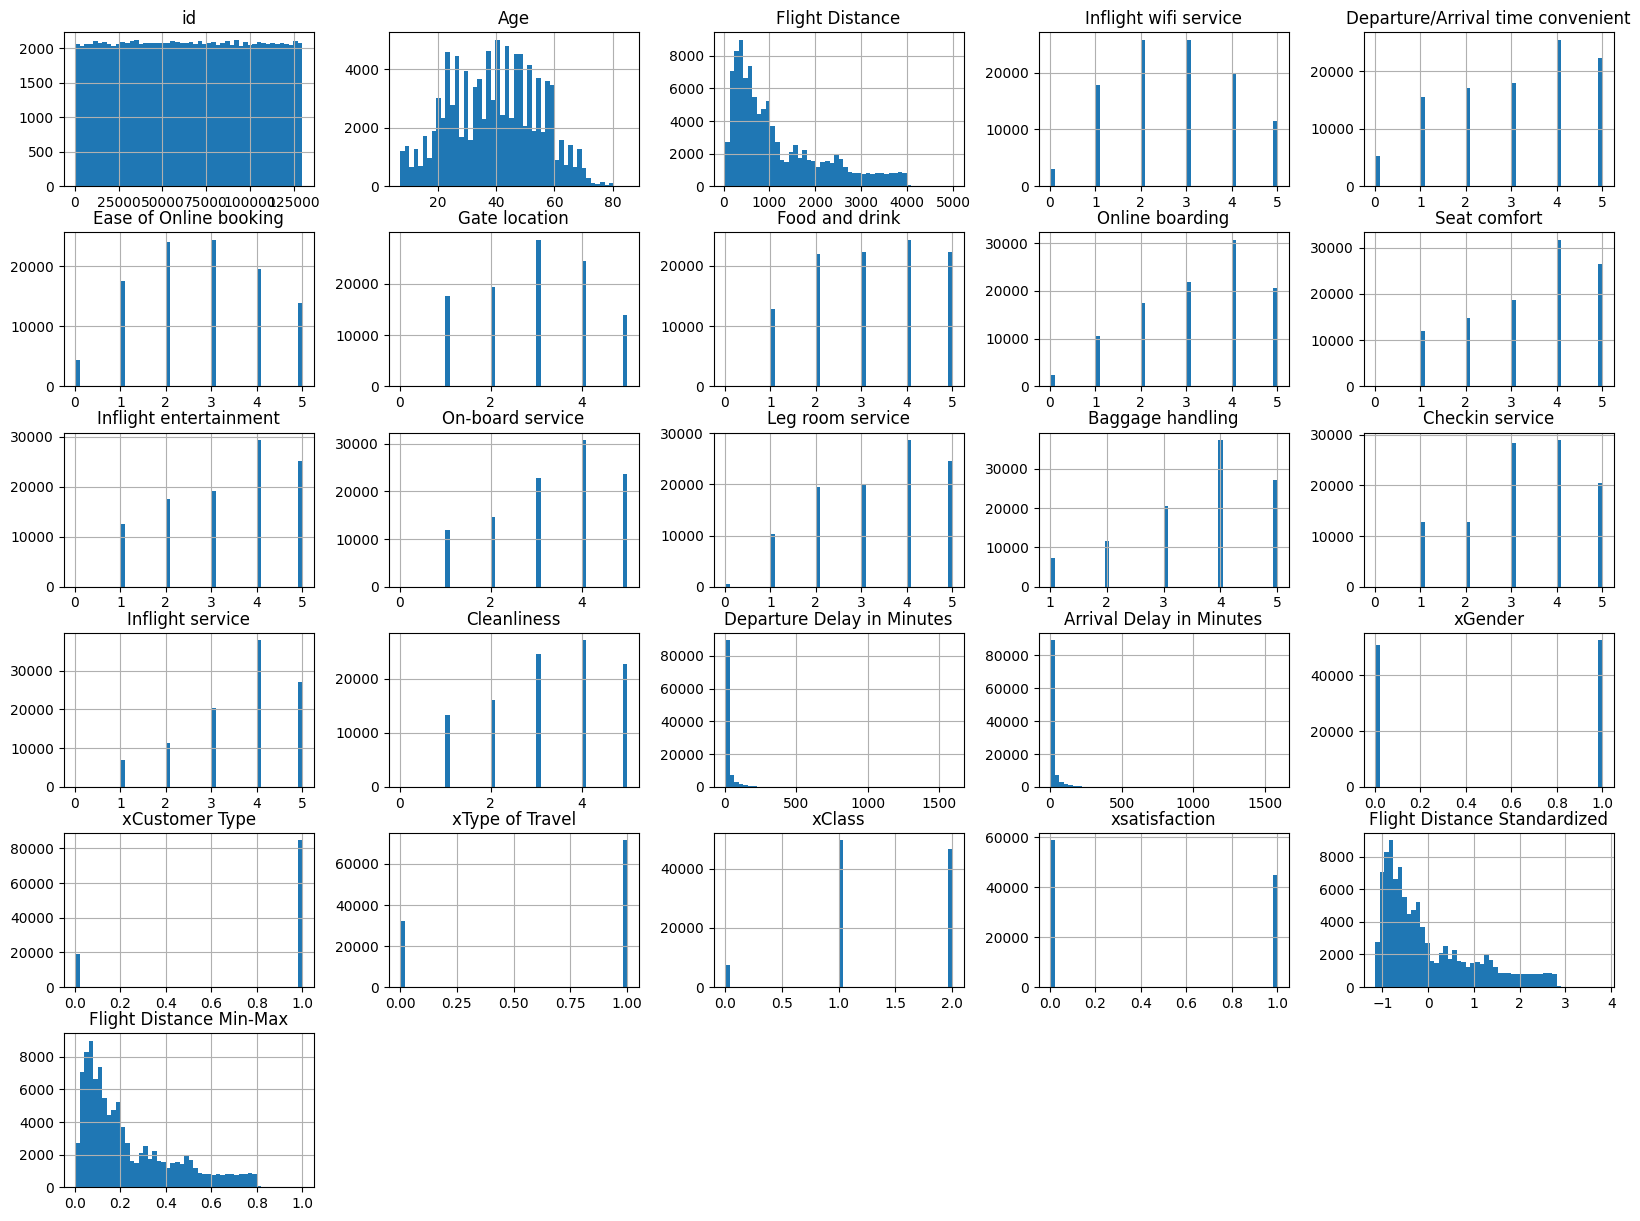

In [20]:
# Histograms
df.hist(bins=50, figsize=(20,15))
plt.show()


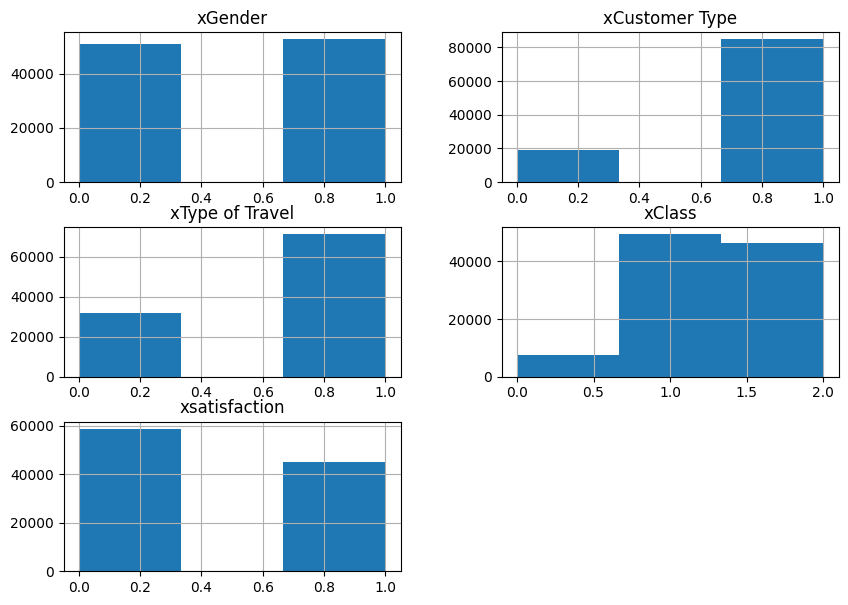

In [21]:
df[['xGender', 'xCustomer Type', 'xType of Travel','xClass','xsatisfaction']].hist(bins=3, figsize=(10,7))
plt.show()

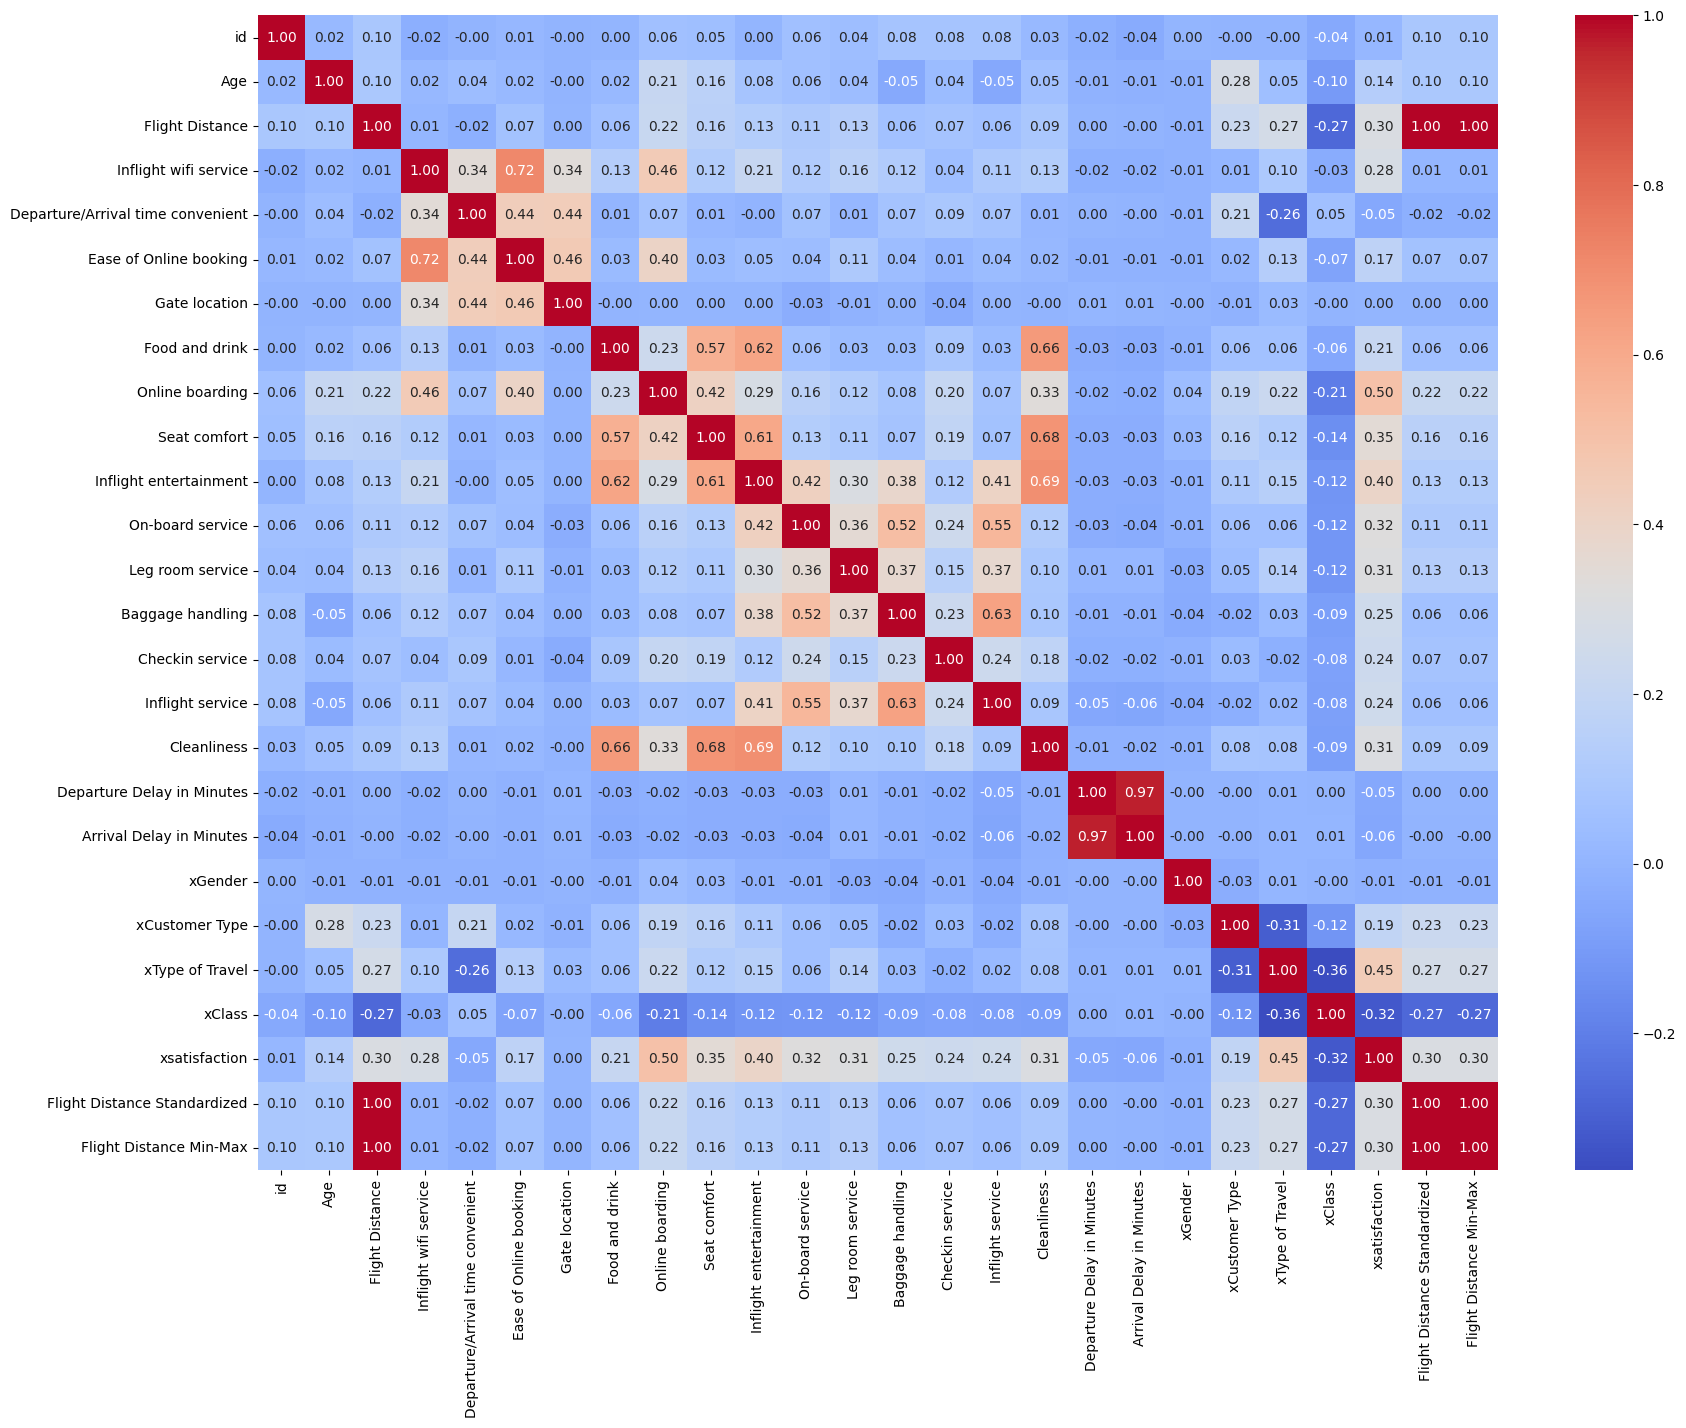

In [22]:
# Heatmap
df_numeric = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(20, 15))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


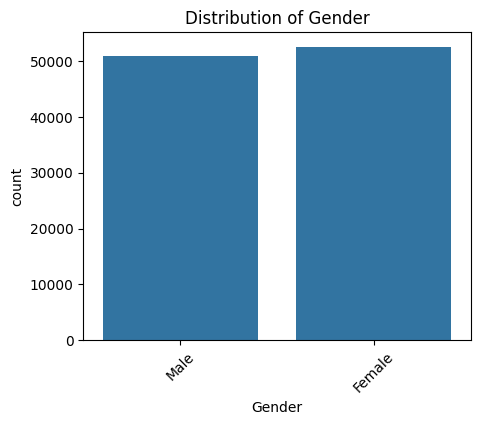

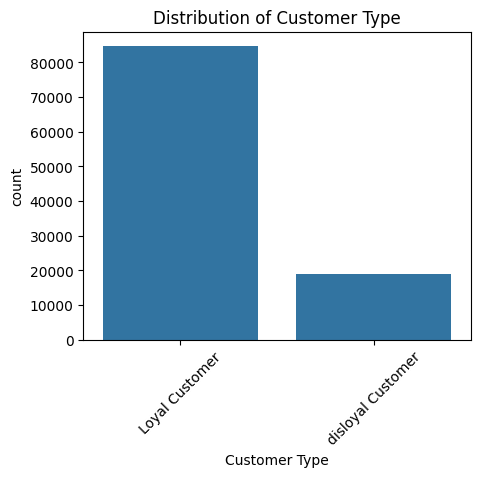

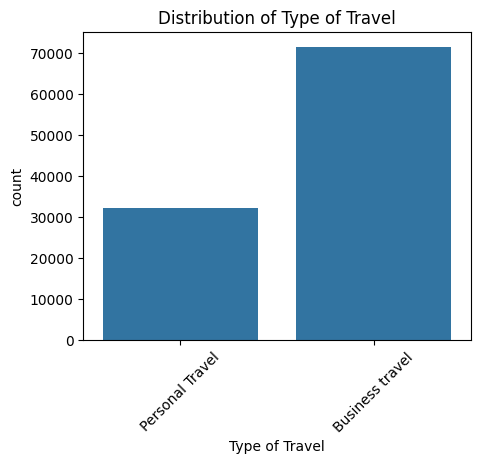

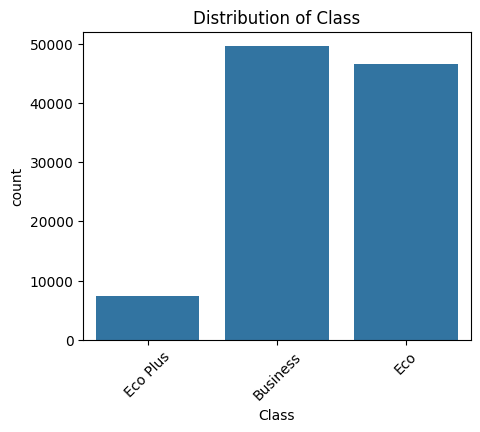

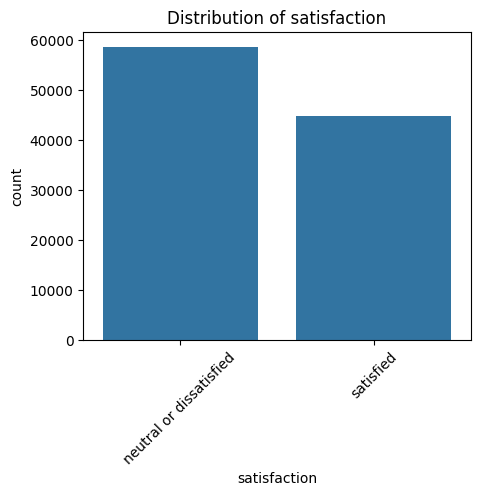

In [23]:

for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(5,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

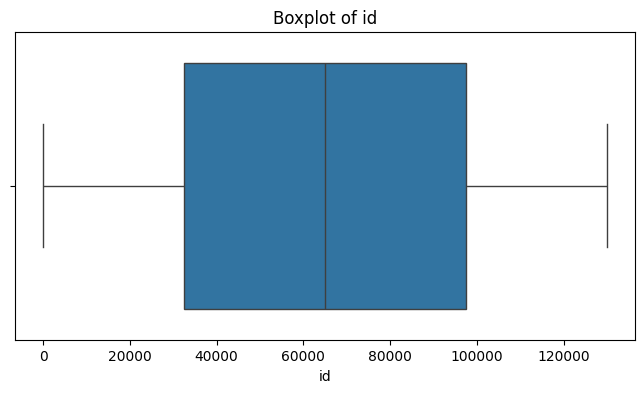

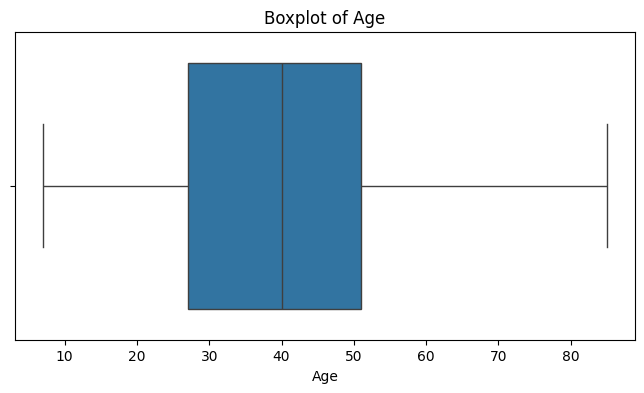

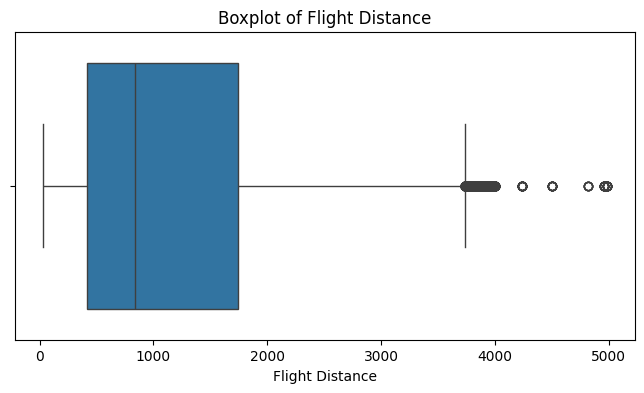

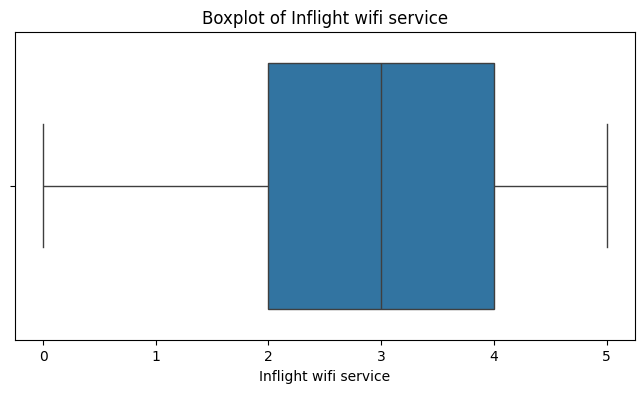

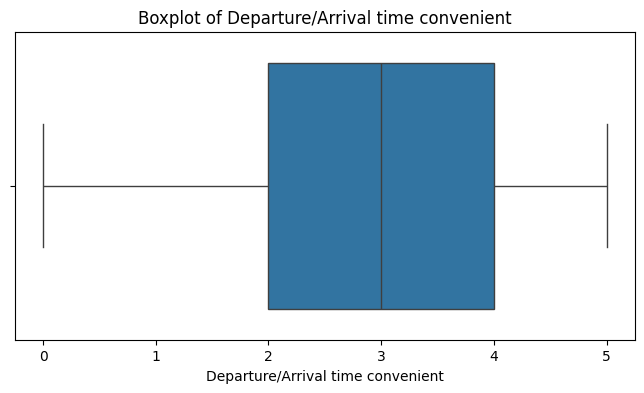

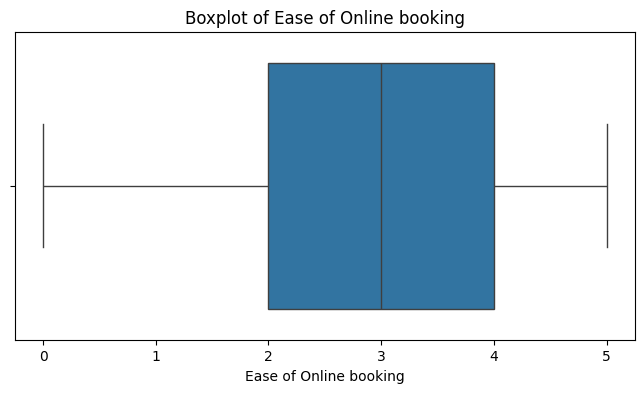

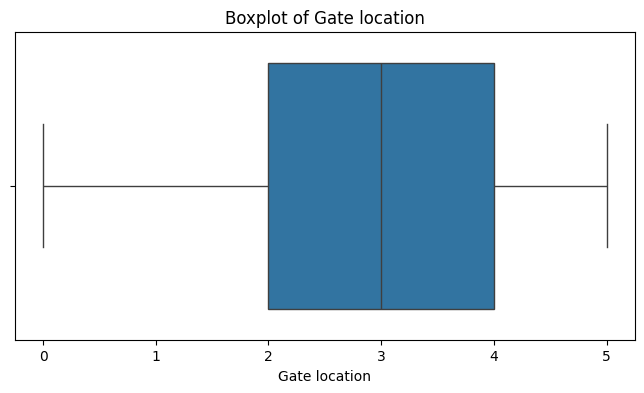

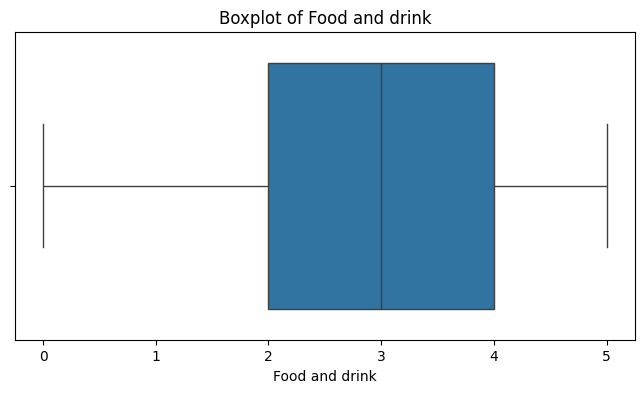

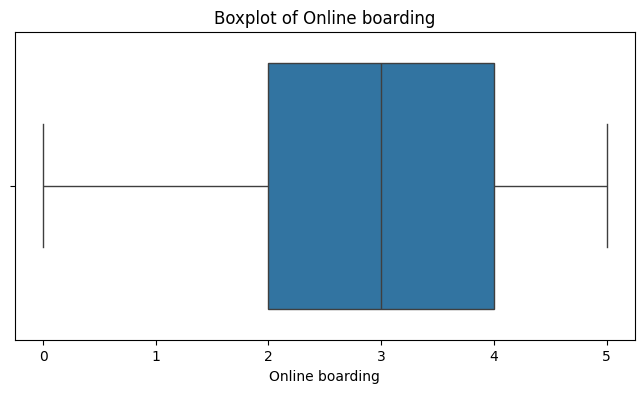

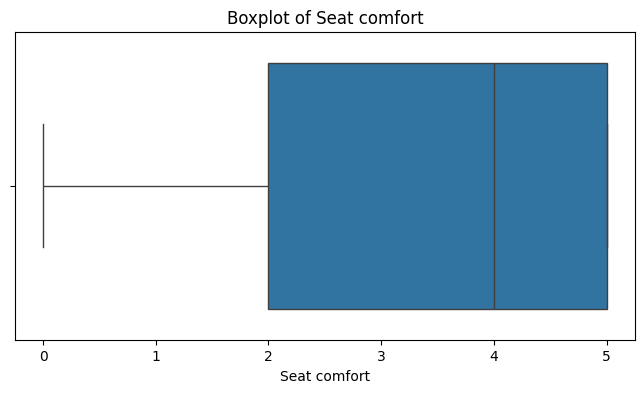

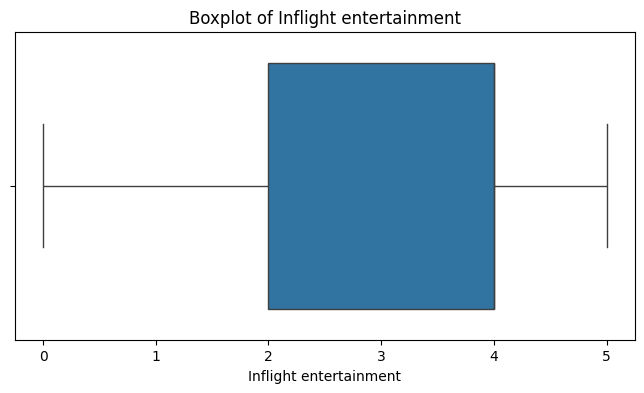

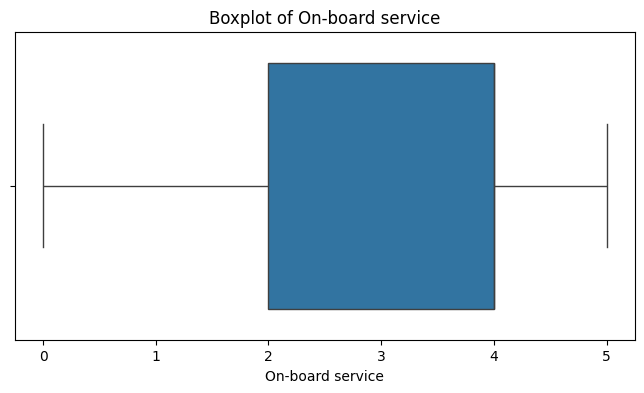

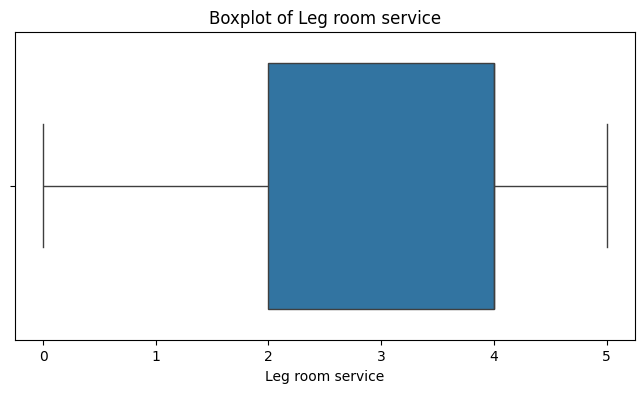

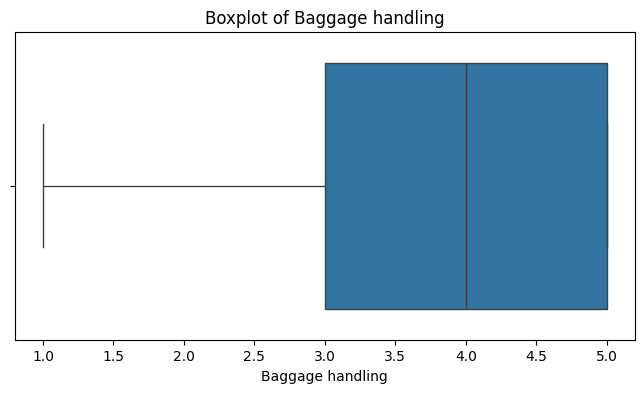

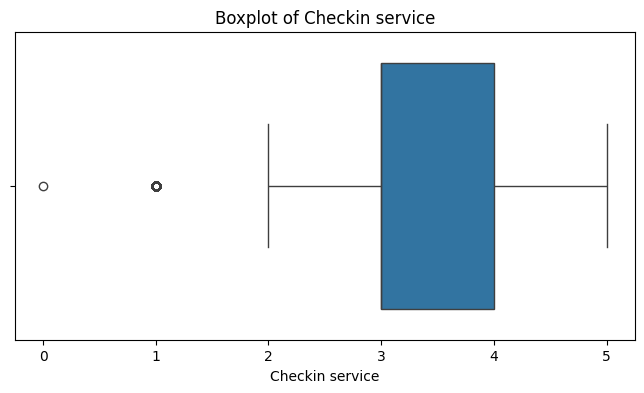

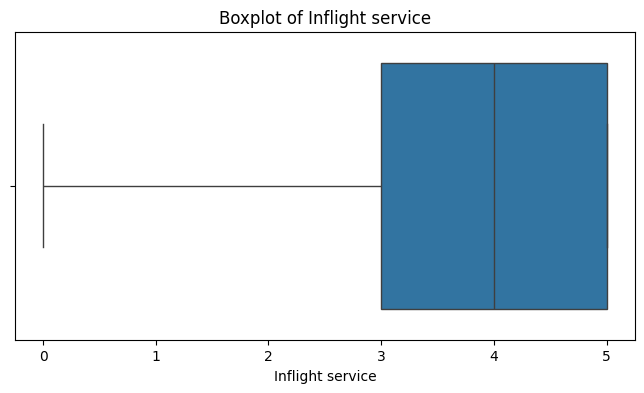

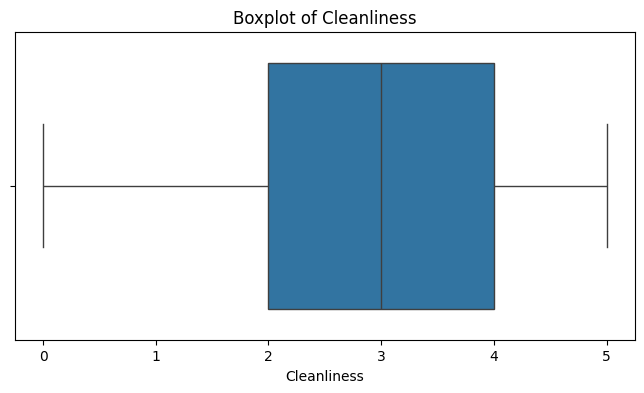

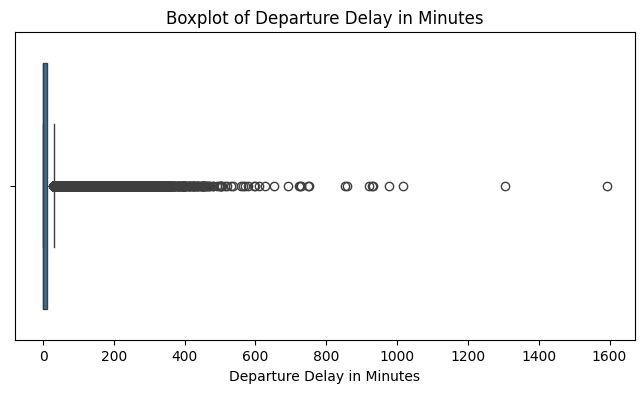

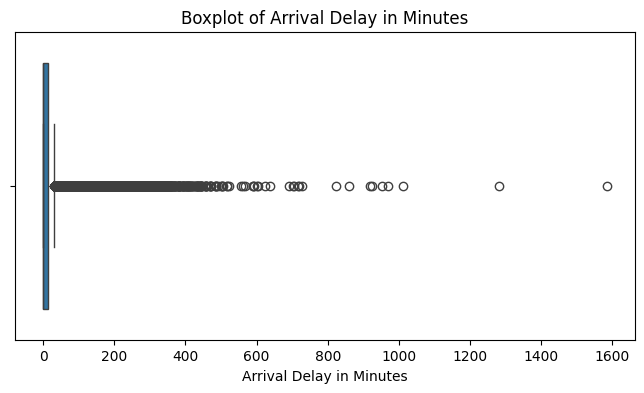

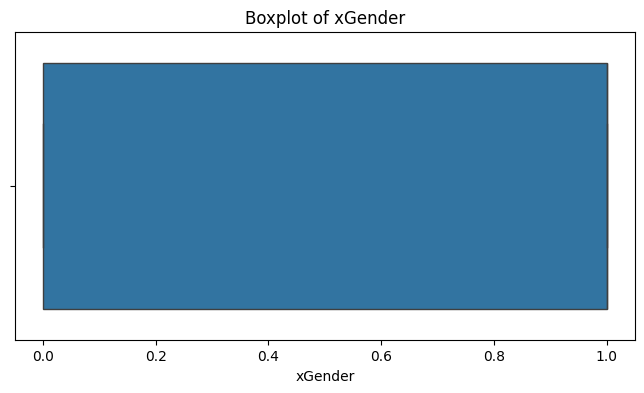

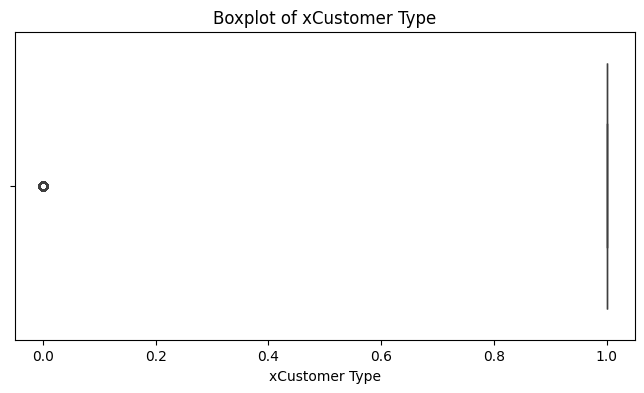

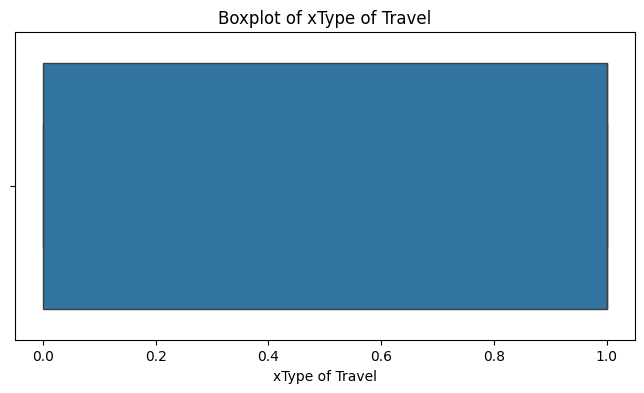

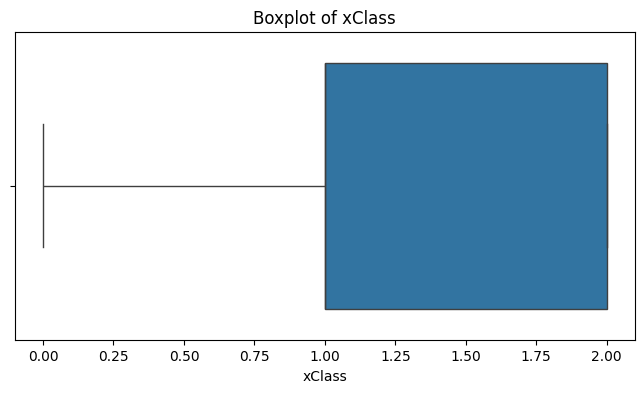

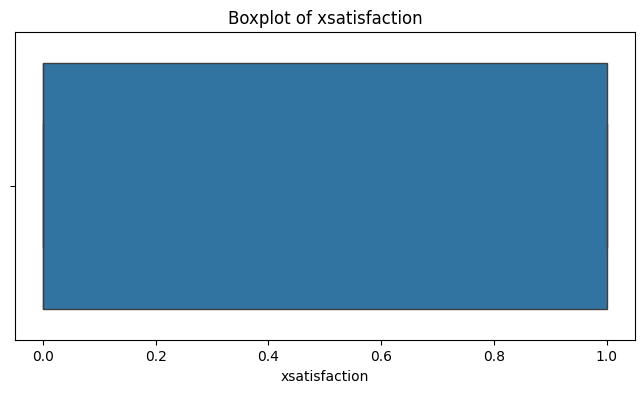

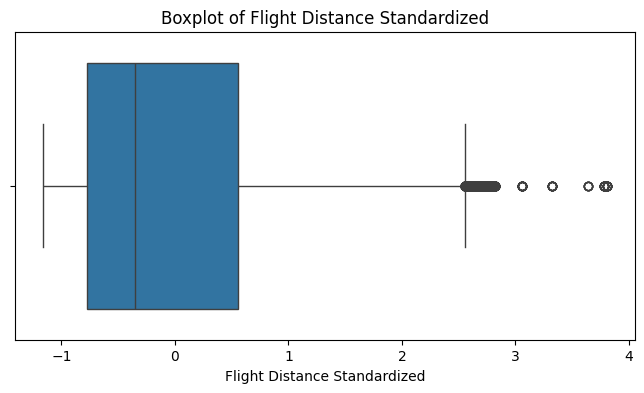

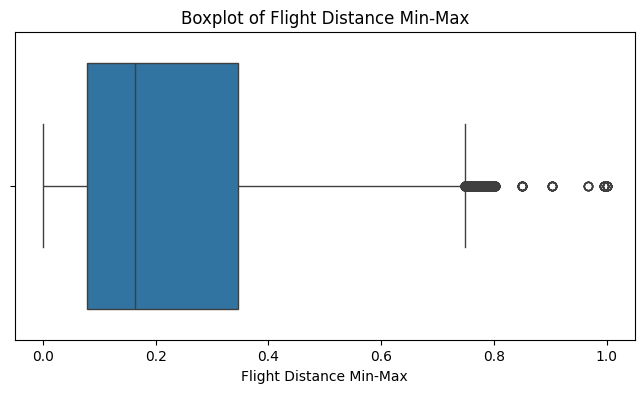

In [24]:

for col in df.select_dtypes(exclude=['object']).columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

<Figure size 1000x600 with 0 Axes>

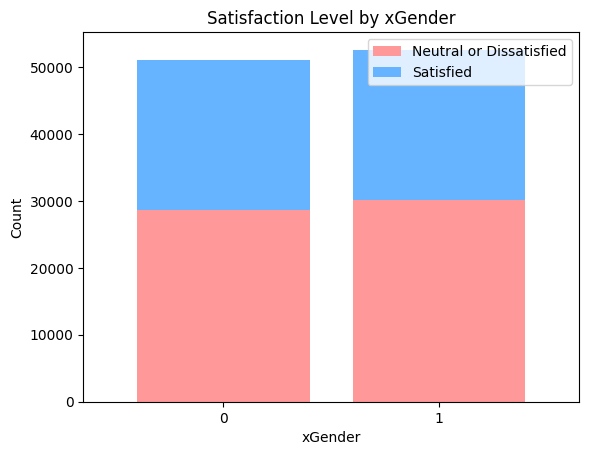

<Figure size 1000x600 with 0 Axes>

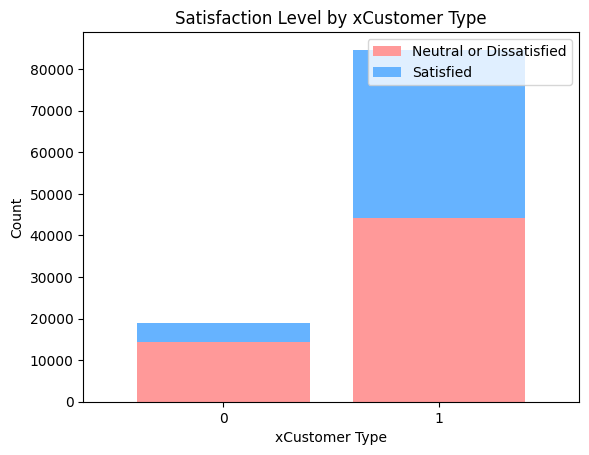

<Figure size 1000x600 with 0 Axes>

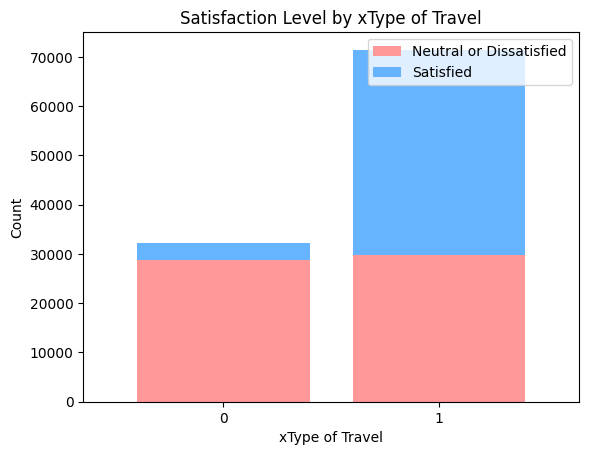

In [48]:
def analyze_satisfaction_by_category(category):
    crosstab = pd.crosstab(df[category], df['xsatisfaction'])
    
    plt.figure(figsize=(10, 6))
    crosstab.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'], width=0.8)
    plt.title(f'Satisfaction Level by {category}')
    plt.xlabel(category)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(['Neutral or Dissatisfied', 'Satisfied'], loc='upper right')
    plt.show()
    
    return crosstab

# Analyze Satisfaction by Gender
gender_satisfaction = analyze_satisfaction_by_category('xGender')

# Analyze Satisfaction by Customer Type
customer_type_satisfaction = analyze_satisfaction_by_category('xCustomer Type')

# Analyze Satisfaction by Type of Travel
type_of_travel_satisfaction = analyze_satisfaction_by_category('xType of Travel')


**Analysis of passenger demographics, flight distances, delays and satisfaction ratings**

/var/folders/9d/9z514xq526zb08lz16wbgfq00000gn/T/ipykernel_885/123690830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Gender', palette=['blue', 'pink'])


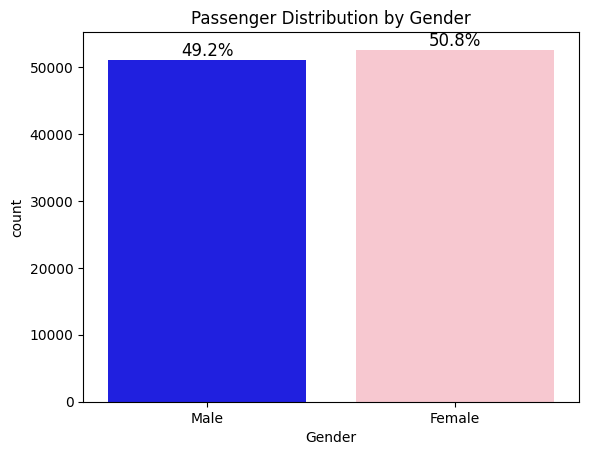

In [25]:
# Passenger distribution by gender
ax = sns.countplot(data=df, x='Gender', palette=['blue', 'pink'])
plt.title('Passenger Distribution by Gender')

male = 100 * len(df[df['Gender'] == "Male"]) / len(df['Gender'])
female = 100 * len(df[df['Gender'] == "Female"]) / len(df['Gender'])

ax.text(0, ax.patches[0].get_height(), f'{male:.1f}%', ha='center', va='bottom', color='black', size=12)
ax.text(1, ax.patches[1].get_height(), f'{female:.1f}%', ha='center', va='bottom', color='black', size=12)

plt.show()


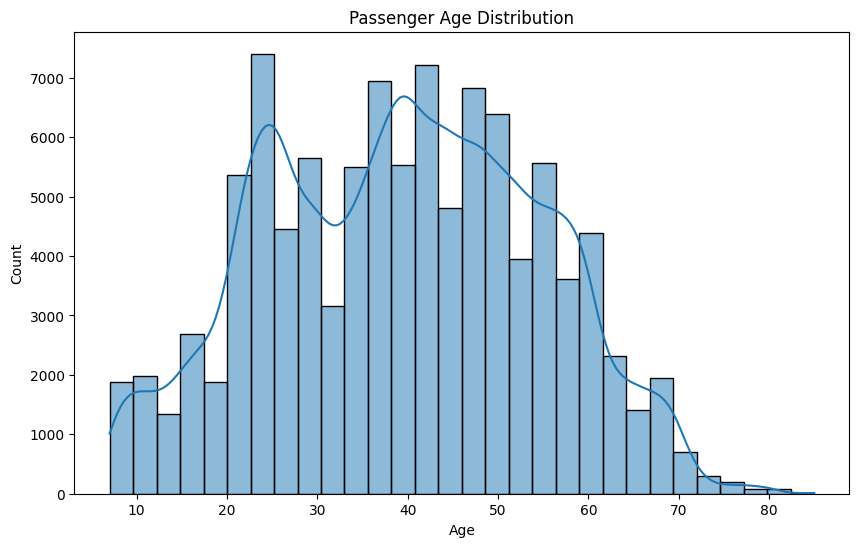

In [26]:
# Passenger age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Passenger Age Distribution')
plt.show()

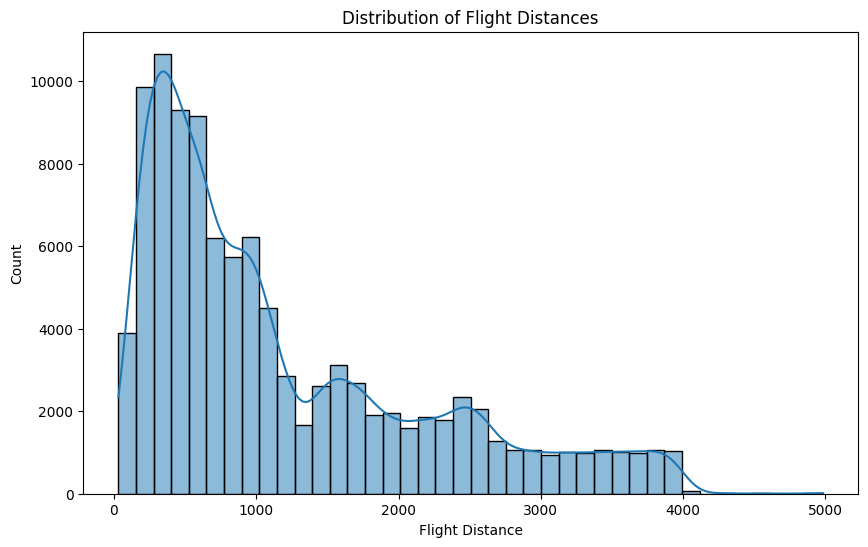

In [27]:
# Histogram of flight distances
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Flight Distance', bins=40, kde=True)
plt.title('Distribution of Flight Distances')
plt.show()


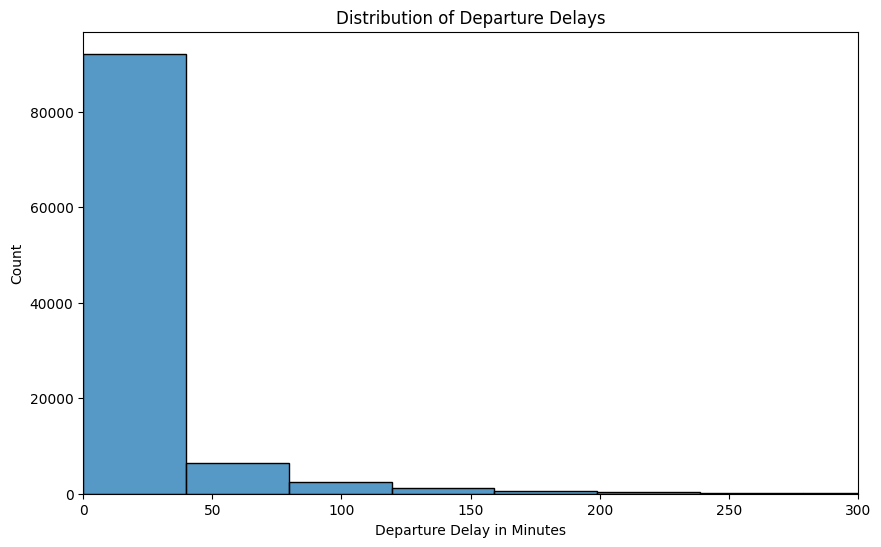

In [28]:
# Histogram of departure delays
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Departure Delay in Minutes', bins=40, kde=False)
plt.title('Distribution of Departure Delays')
plt.xlim(0, 300)  
plt.show()




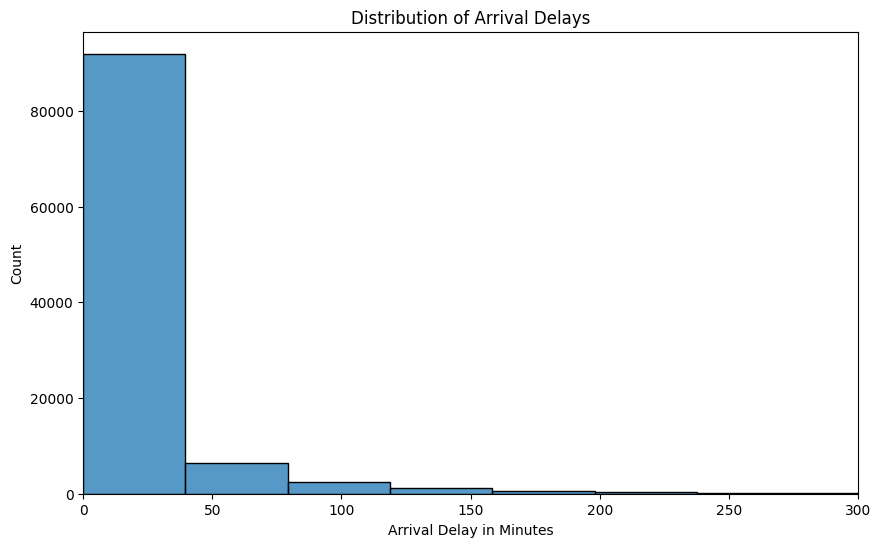

In [29]:
# Histogram of arrival delays
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Arrival Delay in Minutes', bins=40, kde=False)
plt.title('Distribution of Arrival Delays')
plt.xlim(0, 300)  
plt.show()

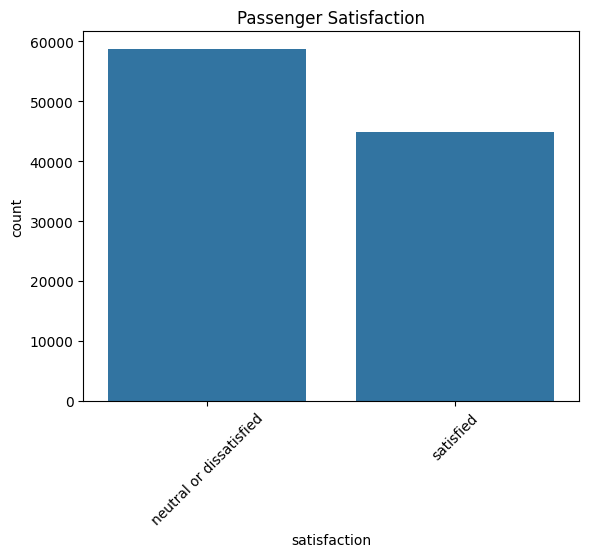

In [30]:
# Bar chart of passenger satisfaction
sns.countplot(data=df, x='satisfaction')
plt.title('Passenger Satisfaction')
plt.xticks(rotation=45)
plt.show()

**3. Predictive Modeling**

In [31]:
columns_to_drop = ['id', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction', 'Flight Distance']
df = df.drop(columns=columns_to_drop)

In [32]:
X = df.drop('xsatisfaction', axis=1)  
y = df['xsatisfaction']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Random Forest** 

In [33]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred = rf_classifier.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9614846276364689
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11655
           1       0.97      0.94      0.96      9064

    accuracy                           0.96     20719
   macro avg       0.96      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



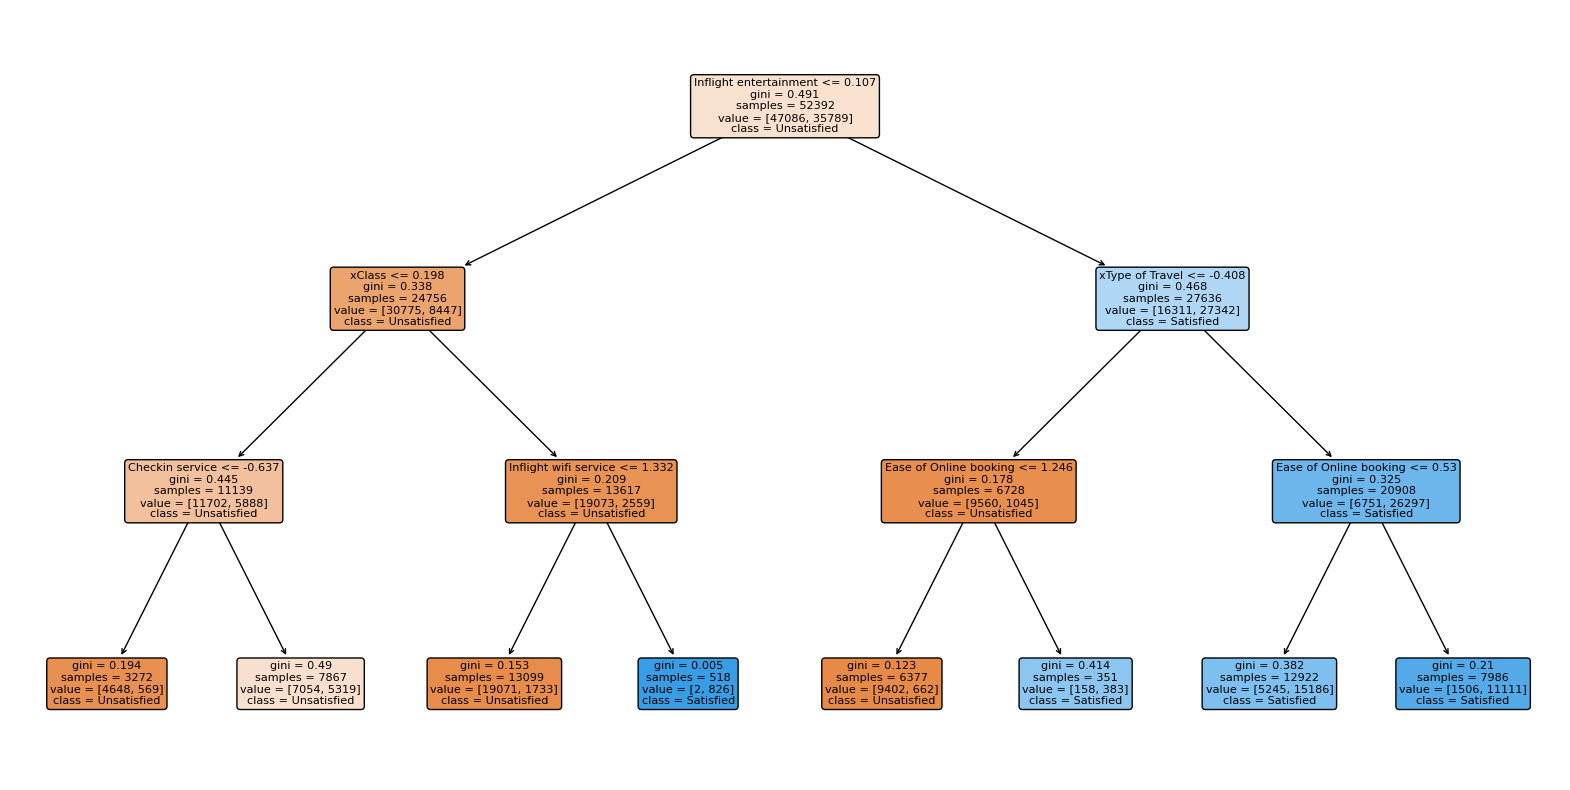

In [35]:
# visualisation 

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)  
rf_classifier.fit(X_train_scaled, y_train)

chosen_tree = rf_classifier.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(chosen_tree, 
          filled=True, 
          rounded=True, 
          class_names=['Unsatisfied', 'Satisfied'],
          feature_names=X.columns)
plt.show()


**Support Vector Machine**

In [36]:
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)

svm_classifier.fit(X_train_scaled, y_train)


SVC(random_state=42)

In [37]:
y_pred_svm = svm_classifier.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.9542931608668372
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11655
           1       0.96      0.93      0.95      9064

    accuracy                           0.95     20719
   macro avg       0.96      0.95      0.95     20719
weighted avg       0.95      0.95      0.95     20719



In [38]:
svm_classifier = SVC(kernel='rbf', C=5.0, random_state=42)

svm_classifier.fit(X_train_scaled, y_train)


SVC(C=5.0, random_state=42)

In [39]:
y_pred_svm = svm_classifier.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.958878324243448
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     11655
           1       0.97      0.94      0.95      9064

    accuracy                           0.96     20719
   macro avg       0.96      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



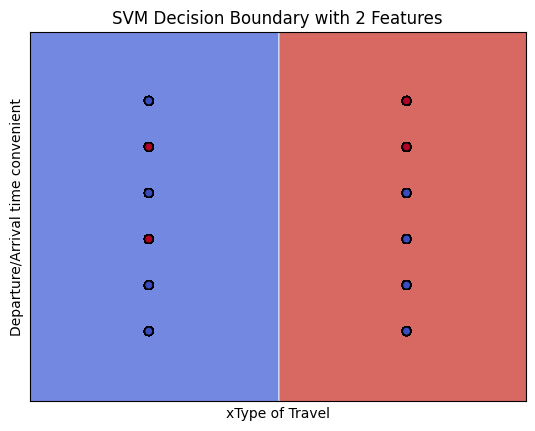

In [40]:
# Visualisation RVM on two factors 
X_example = df[['xType of Travel', 'Departure/Arrival time convenient']].values
y_example = df['xsatisfaction'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_example)

svm_model = SVC(kernel='linear')
svm_model.fit(X_scaled, y_example)

h = .02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_example, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('xType of Travel')
plt.ylabel('Departure/Arrival time convenient')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVM Decision Boundary with 2 Features')
plt.show()


**Logistic regression**

In [41]:
X = df.drop('xsatisfaction', axis=1)  
y = df['xsatisfaction']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
logistic_model = LogisticRegression(max_iter=1000)  

logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [43]:
y_pred = logistic_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8714223659443023
Confusion Matrix:
[[10543  1112]
 [ 1552  7512]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     11655
           1       0.87      0.83      0.85      9064

    accuracy                           0.87     20719
   macro avg       0.87      0.87      0.87     20719
weighted avg       0.87      0.87      0.87     20719



**4. Insights summury and recomendation on customer success**


The dataset appears to be related to airline passenger satisfaction, with 25 columns including a range of features such as:

- Gender, Customer Type, Age, Type of Travel, and Class, which are categorical variables describing the passengers.

- Flight Distance, Departure Delay in Minutes, and Arrival Delay in Minutes, which are numerical variables related to the flight details.

- Service ratings like Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, which are likely ordinal variables rating different aspects of the flight experience.

- The target variable satisfaction, indicating passenger satisfaction as either satisfied or neutral or dissatisfied.

Summary Statistics:
- The Age column ranges from 7 to 85, indicating a wide variety of passenger ages. Average age is approximately 39 years.
- Flight Distance varies significantly, from 31 to 4983, indicating both short and long-distance flights. The average flight distance is about 1189 km.
- Departure Delay in Minutes and Arrival Delay in Minutes have high maximum values (1592 and 1584 minutes respectively), indicating some extreme delay cases, but their 75th percentile values are relatively low (12 and 13 minutes respectively), suggesting that most flights have shorter delays.

Conclusions:
- The presence of extreme values in delay durations could be worth investigating further, possibly to understand the causes of such delays or their impact on satisfaction.
- The dominance of loyal customers and business travelers might suggest the dataset is skewed towards frequent flyers or corporate accounts.
- The relatively even split in passenger satisfaction indicates a balanced dataset in terms of the target variable, which is beneficial for predictive modeling.
- Distribution of customer satisfaction: The number of neutral or dissatisfied customers slightly exceeds the number of satisfied ones, which may indicate potential areas for service improvement.

Based on the summary table and visualization, we can draw the following conclusions regarding passenger satisfaction by service class:

- Business Class: The majority of Business Class passengers (34,480 out of 49,665) are satisfied with the services. The proportion of satisfied passengers in Business Class is significantly high.
- Economy Class (Eco): In Economy Class, the majority of passengers (38,044 out of 46,745) are neutral or dissatisfied. The proportion of satisfied passengers in this class is considerably lower.
- Economy Plus Class (Eco Plus): In this category, neutral or dissatisfied passengers also dominate (5,650 out of 7,494), but the proportion of satisfied passengers is slightly higher than in the regular Economy Class.

These results show that passenger satisfaction is significantly higher in Business Class compared to Economy and Economy Plus Classes. This may be due to better services, more comfort, and other benefits typically offered to Business Class passengers.

Satisfaction by Gender:
The analysis shows that the distribution of satisfaction levels between male and female passengers is fairly similar. Both genders have a considerable number of satisfied as well as neutral or dissatisfied passengers. This suggests that gender may not be a significant determinant of satisfaction levels in this dataset.

Satisfaction by Customer Type:
The distinction between Loyal Customers and disloyal Customers is more pronounced. Loyal Customers tend to be more satisfied compared to disloyal Customers, who have a higher proportion of neutral or dissatisfied responses. This indicates that customer loyalty is a significant factor in satisfaction, with loyal customers generally experiencing higher satisfaction levels.

Satisfaction by Type of Travel:
The Type of Travel variable shows a clear difference in satisfaction levels. Passengers traveling for business purposes are more likely to be satisfied compared to those traveling for personal reasons. This could reflect the different expectations and experiences associated with these two types of travel.

These analyses provide insights into how different passenger segments perceive their travel experience. Understanding these patterns can help airlines tailor their services to better meet the needs and expectations of diverse customer groups, potentially leading to higher overall satisfaction levels. ​

Based on the flight duration categories and the analysis of various metrics, here are some key findings and trends:

Average Age:
- The average age of passengers tends to be slightly higher in the Long-haul category (approximately 42.6 years) compared to other categories. This could suggest that older passengers may prefer or have the means for longer flights.
- Short-haul and Medium-haul flights have similar average ages, around 38.5 to 38.7 years.
- Ultra-long-haul flights have the youngest average age at approximately 37.2 years, which might indicate a preference for such long distances among slightly younger travelers.

Departure and Arrival Delays:
- Average departure and arrival delays are relatively consistent across the categories, with Medium-haul and Ultra-long-haul flights experiencing slightly higher average departure delays.
- Ultra-long-haul flights have the highest average arrival delay (around 18.1 minutes), which could be due to the complexity and length of these flights.

Satisfaction Levels:
- There's a noticeable increase in the proportion of satisfied passengers in the Long-haul category, with more than twice as many satisfied passengers compared to Short-haul and Medium-haul flights.
- Short-haul flights have the highest number of neutral or dissatisfied passengers, possibly due to the basic service expectations and the nature of short trips.

Trends:
- The tendency for longer flights to have a higher proportion of older passengers and a higher satisfaction rate might indicate that these flights offer features or services that cater better to this demographic's needs or expectations.
- The consistency in delay times across flight durations suggests that airlines maintain a standard operational efficiency, regardless of the flight length. However, the slight increase in delays for Ultra-long-haul flights could be an area for airlines to investigate and improve.
- The higher satisfaction in Long-haul and Ultra-long-haul categories could be due to various factors such as seat comfort, in-flight entertainment, meal quality, and overall service, which might be perceived as better value or quality in longer flights.
These insights could help airlines tailor their services and operational focus to enhance passenger experience across different flight durations, paying special attention to the unique expectations and needs of passengers in each category.
- Carry out improvements focusing on the quality of services and satisfaction of economy class passengers